In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
data = pd.read_csv('file.csv')

In [13]:
data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [130]:
data.duplicated().sum()
data[data.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,year
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,2019-04-05,TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...,97,min,2019.0
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,2020-09-04,TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...,94,min,2020.0


In [131]:
data.drop_duplicates(inplace= True)

## Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [132]:
print("Show_Id: ",data[data['Title'] == 'House of Cards'].Show_Id, "\n Director: ",data[data['Title'] == 'House of Cards'].Director)

Show_Id:  2832    s2833
Name: Show_Id, dtype: object 
 Director:  2832    Robin Wright, David Fincher, Gerald McRaney, J...
Name: Director, dtype: object


## Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [133]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'].str.strip())

AttributeError: Can only use .str accessor with string values!

In [134]:
data['Release_Date'].dt.year

0       2020.0
1       2016.0
2       2018.0
3       2017.0
4       2020.0
         ...  
7784    2020.0
7785    2019.0
7786    2020.0
7787    2020.0
7788    2020.0
Name: Release_Date, Length: 7787, dtype: float64

In [135]:
index_max = data['Title'].groupby(data['Release_Date'].dt.year).count().idxmax()
value_max = data['Title'].groupby(data['Release_Date'].dt.year).count().max()
tableau = data['Title'].groupby(data['Release_Date'].dt.year).count()

<Axes: xlabel='Release_Date'>

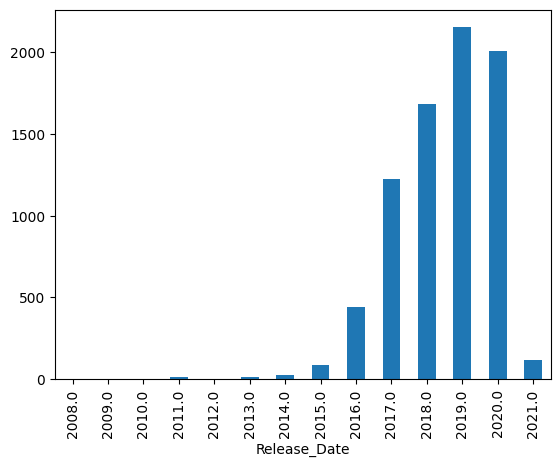

In [136]:
data['Title'].groupby(data['Release_Date'].dt.year).count().plot(kind= 'bar')

## Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

In [137]:
data.groupby(data['Category']).Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

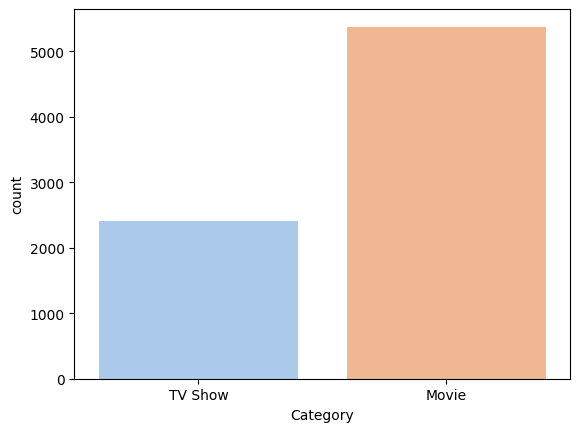

In [138]:
sns.countplot(x = data['Category'], hue= data['Category'], palette= 'pastel')

## Q. 4) Show all the Movies that were released in year 2000.

In [139]:
data[data['Release_Date'].dt.year == 2000]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,year


## Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [140]:
data[(data['Country'] == 'India') & (data['Category'] == 'TV Show')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,year
86,s87,TV Show,21 Sarfarosh: Saragarhi 1897,NaN,"Luke Kenny, Mohit Raina, Mukul Dev",India,2018-12-01,TV-14,1 Season,"International TV Shows, TV Dramas","In one of history's greatest last stands, a ba...",1,Season,2018.0
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,1,Season,2019.0
340,s341,TV Show,Agent Raghav,NaN,"Sharad Kelkar, Aahana Kumra, Mahesh Manjrekar,...",India,2017-04-15,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Act...","A mix of brilliance, erudition and skill enabl...",1,Season,2017.0
364,s365,TV Show,Akbar Birbal,NaN,"Kiku Sharda, Vishal Kotian, Delnaaz Irani",India,2020-03-31,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas","From battles of wit to fights for justice, Emp...",1,Season,2020.0
533,s534,TV Show,Anjaan: Rural Myths,NaN,NaN,India,2018-12-15,TV-14,1 Season,"International TV Shows, TV Horror, TV Thrillers",Spine-chilling stories of malevolent spirits u...,1,Season,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249,s6249,TV Show,The Creative Indians,NaN,NaN,India,2020-08-24,TV-MA,2 Seasons,"Docuseries, International TV Shows",From chefs and comedians to filmmakers and fas...,2,Seasons,2020.0
6400,s6399,TV Show,The Golden Years with Javed Akhtar,NaN,NaN,India,2017-06-01,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",1,Season,2017.0
6469,s6468,TV Show,The House That Made Me,NaN,Vinay Pathak,India,2017-03-31,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret...",3,Seasons,2017.0
7294,s7293,TV Show,Typewriter,NaN,"Aarna Sharma, Aaryansh Malviya, Mikail Gandhi,...",India,2019-07-19,TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries",Three young friends in Goa plan to search an o...,1,Season,2019.0


## Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [141]:
data['Director'].value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Lance Bangs                8
Name: count, dtype: int64

## Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [142]:
data[(data['Type'].str.contains('Comedies')) | (data['Country'] ==  'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,year
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",124,min,2019.0
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",87,min,2018.0
29,s30,TV Show,#blackAF,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020-04-17,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...,1,Season,2020.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99,min,2017.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,105,min,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,2019-12-15,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,154,min,2019.0
7774,s7773,Movie,Zipi & Zape y la Isla del Capitan,Oskar Santos,"Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...",Spain,2017-07-01,TV-PG,105 min,"Children & Family Movies, Comedies","At Christmas, Zip and Zap take a trip with the...",105,min,2017.0
7779,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2,Seasons,2019.0
7780,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,min,2019.0


## Q. 8) In how many movies/shows, Tom Cruise was cast ?

In [143]:
data[data['Cast'].fillna('').str.contains('Tom Cruise')].Category.count() # s'il y a dans cette colonne des valeurs null nous devons 
# les remplacer par '' 

np.int64(2)

# Q. 9) What are the different Ratings defined by Netflix ?

In [144]:
data.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [145]:
data.Rating.fillna('').unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', '',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?

In [146]:
data[(data['Rating'] == 'TV-14') & (data['Country'] == 'Canada') & (data['Category'] ==  'Movie')].count().Show_Id

np.int64(11)

## Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

In [147]:
data[(data['Rating'] == 'R') & (data['Release_Date'].dt.year > 2018) & (data['Category'] ==  'TV Show')].count().Show_Id

np.int64(1)

## Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

In [148]:
data[['Minutes', 'Unit']] = data.Duration.str.split(' ', expand=True)
data

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,Seasons,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,min,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,min,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,99,min,2020.0
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,min,2019.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",44,min,2020.0
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,1,Season,2020.0


In [149]:
data['Minutes'] = pd.to_numeric(data['Minutes'])
data['Minutes'].max()

np.int64(312)

In [150]:
data[(data['Category'] ==  'Movie')].Minutes.max()

np.int64(312)

In [151]:
data[(data['Category'] ==  'TV Show')].Minutes.max()

np.int64(16)

## Q. 11) Which individual country has the Highest No. of TV Shows ?

In [152]:
data[data['Category'] ==  'TV Show'].Country.value_counts().head(1)

Country
United States    705
Name: count, dtype: int64

## Q. 12) How can we sort the dataset by Year ?

In [153]:
data['year'] = data['Release_Date'].dt.year

In [154]:
data.sort_values(by='year' , ascending= False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,year
7147,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,2021-01-06,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...,99,min,2021.0
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,2021-01-15,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,1,Season,2021.0
4813,s4814,Movie,Peepli Live,"Anusha Rizvi, Mahmood Farooqui","Omkar Das Manikpuri, Raghuvir Yadav, Malaika S...",India,2021-01-10,TV-MA,109 min,"Comedies, Dramas, Independent Movies",Two indigent farmers consider suicide so that ...,109,min,2021.0
6699,s6698,Movie,The Naked Gun: From the Files of Police Squad!,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",United States,2021-01-01,PG-13,85 min,"Comedies, Cult Movies",Hapless cop Frank Drebin causes more problems ...,85,min,2021.0
3441,s3442,TV Show,Korean Pork Belly Rhapsody,NaN,Paik Jong-won,NaN,2021-01-04,TV-G,1 Season,"Docuseries, International TV Shows",A love letter to pork belly — a perennial favo...,1,Season,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2,Seasons,NaN
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",3,Seasons,NaN
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,Seasons,NaN
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,Seasons,NaN


## Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.

In [155]:
data[((data['Type'].str.contains('Dramas')) & (data['Category'] ==  'Movie')) | ( (data['Category'] ==  'Movie') & (data['Type'].str.contains("Kids") ))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Minutes,Unit,year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,min,2016.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,min,2020.0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...,119,min,2019.0
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...,103,min,2017.0
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,2019-09-01,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...,149,min,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,min,2019.0
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp...",104,min,2018.0
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,94,min,2018.0
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,99,min,2020.0
